In [1]:
import matplotlib.pyplot as plt
import numpy as np

from datasets.mnist import MNIST

from models.cae_model import CAE
from models.conv_model import CNN

from train import train_ae, train_cnn

from models.cem_ibm_model import AEADEN 

import os
import time

In [2]:
dataset = MNIST(batch_size=64)
# dataset = FashionMNIST()

# Training the classifier

In [3]:
cnn = CNN(device='cuda:0')

train_cnn(cnn, dataset, iterations=25, lr=0.01, device='cuda:0', save_fn='mnist-cnn-m', load_path="")#"models/saved_models/mnist-cnn-m.h5")

D:\Programmeren\uva-fact-ai\models\conv_model.py:50: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = nn.functional.softmax(out)


loss after step 0:2.3022170066833496 accuracy: 0.125
loss after step 100:2.302828788757324 accuracy: 0.09375
loss after step 200:2.3030812740325928 accuracy: 0.109375
loss after step 300:2.303525686264038 accuracy: 0.03125
loss after step 400:2.3024940490722656 accuracy: 0.078125
loss after step 500:2.3018853664398193 accuracy: 0.09375
loss after step 600:2.301913261413574 accuracy: 0.109375
loss after step 700:2.3032169342041016 accuracy: 0.015625
loss after step 800:2.3021368980407715 accuracy: 0.15625
loss after step 900:2.302349805831909 accuracy: 0.078125
done with iteration: 0/25
loss after step 0:2.301616668701172 accuracy: 0.140625
loss after step 100:2.302093029022217 accuracy: 0.078125
loss after step 200:2.3017687797546387 accuracy: 0.109375
loss after step 300:2.302215337753296 accuracy: 0.078125
loss after step 400:2.3019769191741943 accuracy: 0.203125
loss after step 500:2.3017895221710205 accuracy: 0.265625
loss after step 600:2.3023319244384766 accuracy: 0.1875
loss aft

done with iteration: 13/25
loss after step 0:1.541780710220337 accuracy: 0.90625
loss after step 100:1.4713952541351318 accuracy: 1.0
loss after step 200:1.4832686185836792 accuracy: 0.96875
loss after step 300:1.5127252340316772 accuracy: 0.953125
loss after step 400:1.5123679637908936 accuracy: 0.953125
loss after step 500:1.4834167957305908 accuracy: 0.984375
loss after step 600:1.4932405948638916 accuracy: 0.96875
loss after step 700:1.5203105211257935 accuracy: 0.9375
loss after step 800:1.5255910158157349 accuracy: 0.9375
loss after step 900:1.5037399530410767 accuracy: 0.953125
done with iteration: 14/25
loss after step 0:1.5014501810073853 accuracy: 0.953125
loss after step 100:1.4955178499221802 accuracy: 0.96875
loss after step 200:1.4919843673706055 accuracy: 0.96875
loss after step 300:1.536779761314392 accuracy: 0.921875
loss after step 400:1.5078556537628174 accuracy: 0.953125
loss after step 500:1.5080397129058838 accuracy: 0.953125
loss after step 600:1.4924887418746948

In [4]:
images, _ = dataset.get_batch()
cnn.cpu()
output = cnn(images)

images = images.numpy()
output = output.detach().numpy()


# Training the autoencoder

This section trains the autoencoder which will be used as regularizer for the data space which the perturbations are found in.

In [5]:
# Train or load autoencoder
cae = CAE(device='cuda:0')

train_ae(cae, dataset, iterations=25, device='cuda:0', save_fn="mnist-cae-m", load_path="")

loss after epoch 0:0.003592866938561201
loss after epoch 1:0.0025469784159213305
loss after epoch 2:0.0019472016720101237
loss after epoch 3:0.0021112742833793163
loss after epoch 4:0.002084490843117237
loss after epoch 5:0.0015514128608629107
loss after epoch 6:0.0019547543488442898
loss after epoch 7:0.001455993391573429
loss after epoch 8:0.0015807426534593105
loss after epoch 9:0.0015778376255184412
loss after epoch 10:0.0014438290381804109
loss after epoch 11:0.0017360105412080884
loss after epoch 12:0.0014669690281152725
loss after epoch 13:0.0012213758891448379
loss after epoch 14:0.0012671292060986161
loss after epoch 15:0.00140152289532125
loss after epoch 16:0.0014618884306401014
loss after epoch 17:0.0012866591569036245
loss after epoch 18:0.0012531594838947058
loss after epoch 19:0.0014301910996437073
loss after epoch 20:0.0013531059958040714
loss after epoch 21:0.0013855083379894495
loss after epoch 22:0.001296713948249817
loss after epoch 23:0.0012495736591517925
loss aft

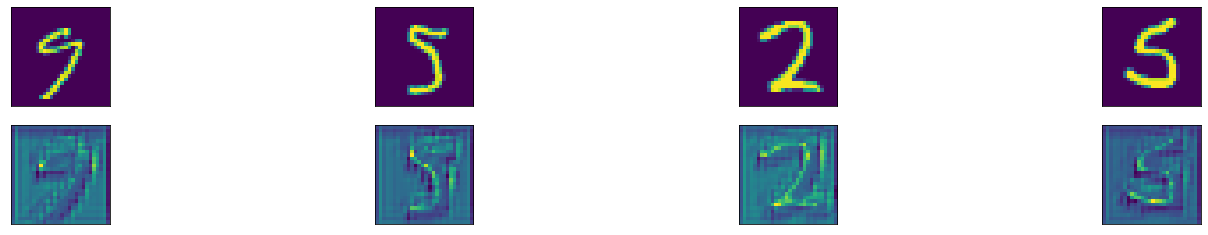

In [30]:
# obtain one batch of test images
images, _ = dataset.get_batch()

#images_flatten = images.view(images.size(0), -1)
# get sample outputs
cae.float()
output = cae(images.cpu()+0.5)
# prep images for display
images = images.cpu().numpy()

# output is resized into a batch of images
# output = output.view(batch_size, 1, 28, 28)
# use detach when it's an output that requires_grad
output = output.cpu().detach().numpy()

# plot the first ten input images and then reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=4, sharex=True, sharey=True, figsize=(25,4))

# input images on top row, reconstructions on bottom
for images, row in zip([images, output], axes):
    for img, ax in zip(images, row):
        ax.imshow(np.squeeze(img))#, cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

# Contrastive Explanation Method

In [31]:
kappa = 10
gamma = 10
beta = 0
lr = 0.1
cae.cpu()
cnn.cpu()

CEM = AEADEN(model=cnn, AE=cae, max_iterations=300, evaluate_every=50, n_searches=10, mode="PP", init_learning_rate=lr, c_init=0.1, kappa=kappa, gamma=gamma, beta=beta)

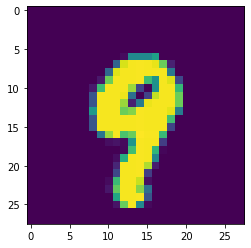

In [32]:
# obtain one sample
image, _ = dataset.get_sample()

plt.imshow(image.squeeze())


In [33]:
# find pertinent negatives
cnn.float()
CEM.compute_CEM(image)

search:0 iteration:50 lr:0.09 c value:0.10 loss: 1.23 delta sum:-338.39 optimum:True y grad:-125.143
search:0 iteration:100 lr:0.08 c value:0.10 loss: 0.00 delta sum:-341.23 optimum:True y grad:-143.056
search:0 iteration:150 lr:0.07 c value:0.10 loss: 0.00 delta sum:-345.78 optimum:True y grad:-337.276
search:0 iteration:200 lr:0.06 c value:0.10 loss: 0.16 delta sum:-324.21 optimum:True y grad:-242.427
search:0 iteration:250 lr:0.04 c value:0.10 loss: 1.08 delta sum:-280.63 optimum:True y grad:-71.166
search:0 iteration:300 lr:0.01 c value:0.10 loss: 1.14 delta sum:-280.03 optimum:True y grad:-81.371
hallo
search:1 iteration:50 lr:0.09 c value:0.10 loss: 0.13 delta sum:-340.69 optimum:True y grad:-229.961
search:1 iteration:100 lr:0.08 c value:0.10 loss: 0.30 delta sum:-343.17 optimum:True y grad:-230.288
search:1 iteration:150 lr:0.07 c value:0.10 loss: 0.07 delta sum:-343.96 optimum:True y grad:-162.286
search:1 iteration:200 lr:0.06 c value:0.10 loss: 0.00 delta sum:-328.15 optimum

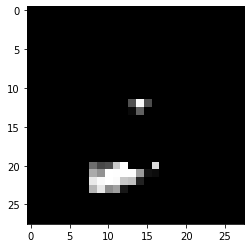

In [18]:
# perturbation
plt.imshow(image.squeeze()- CEM.delta_tracker[-1].view(28,28), cmap="gray")

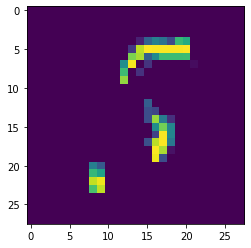

In [20]:
# original image with perturbation
plt.imshow(CEM.delta_tracker[-4].view(28,28))

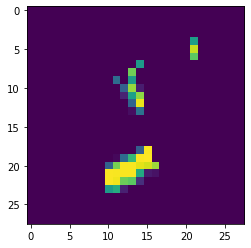

In [21]:
plt.imshow(image.view(28,28)-CEM.delta_tracker[-4].view(28,28))

In [23]:
# classification before
cnn.float()
before = np.argmax(cnn(image.squeeze(-1)).detach()).item()
before

5

In [25]:
cnn.double()
# classification after
after = np.argmax(cnn(CEM.delta_tracker[-4].view(1,28,28)).detach()).item()
after

2

In [15]:
# classification after
cnn.double()
# classification of delta
class_delta = np.argmax(cnn(image.squeeze(-1) - CEM.best_delta.view(1,28,28)).detach()).item()
class_delta

7

In [16]:
dirname = "saved_perturbations/kappa-{}-gamma-{}-beta-{}-lr-{}".format(kappa, gamma, beta, lr)
os.makedirs(dirname, exist_ok=True)
fname_orig = dirname + "/{}-cb-{}-ca-{}-orig.png".format(int(time.time()), before, after)
fname_pert = dirname + "/{}-before-{}-after-{}-pert.png".format(int(time.time()), before, after)
fname_combined = dirname + "/{}-before-{}-after-{}-pn.png".format(int(time.time()), before, after)
fname_combined_pp = dirname + "/{}-before-{}-after-{}-pp.png".format(int(time.time()), before, after)
plt.imsave(fname_orig, image.squeeze(), cmap="gray")
plt.imsave(fname_pert, CEM.best_delta.view(28,28) - image.squeeze(), cmap="gray")
plt.imsave(fname_combined, CEM.best_delta.view(28,28), cmap="gray")
plt.imsave(fname_combined_pp, image.squeeze() - CEM.best_delta.view(28,28))

In [17]:
print(CEM.best_loss)

AttributeError: 'AEADEN' object has no attribute 'best_loss'

In [ ]:
print(CEM.best_pert_loss)

In [ ]:
print(CEM.best_c)